<a href="https://colab.research.google.com/github/micaelCZ/Paper_Repositorio/blob/main/EscenarioA_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install --upgrade scikit-learn
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, Dense, Flatten


#Cargar el Dataset
datapath = 'https://raw.githubusercontent.com/micaelCZ/Paper_Repositorio/main/dataset/datasetPreprocesado/Escenario1.csv'
dataframe = pd.read_csv(datapath,low_memory=False, sep=';')
     

#Normalize
def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:,feature_name]= pd.to_numeric(df.loc[:,feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()   
        if (max_value - min_value) > 0:
            df.loc[:,feature_name] = (df.loc[:,feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:,feature_name] = (df.loc[:,feature_name]- min_value)    
    return df
     

dataframe = dataframe.reindex(np.random.permutation(dataframe.index)).copy()

     

keys = dataframe.keys()
data_to_process = dataframe[keys[4:len(keys) - 1]].copy()
x_normalised = dfNormalize(data_to_process)
print(x_normalised.describe())
change_labels = lambda x: 1 if x == 'nonTOR' else 0
     

y_normalised = dataframe['label'].apply(change_labels)

     

X_train, X_test, y_train, y_test = train_test_split(x_normalised,
                                            y_normalised, test_size=0.3, random_state=42)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
        Protocol   Flow Duration   Flow Bytes/s   Flow Packets/s  \
count     7000.0     7000.000000    7000.000000      7000.000000   
mean         0.0        0.400219       0.000143         0.000167   
std          0.0        0.445049       0.011952         0.012051   
min          0.0        0.000000       0.000000         0.000000   
25%          0.0        0.020134       0.000000         0.000000   
50%          0.0        0.044090       0.000000         0.000000   
75%          0.0        0.982961       0.000000         0.000000   
max          0.0        1.000000       1.000000         1.000000   

        Flow IAT Mean   Flow IAT Std   Flow IAT Max   Flow IAT Min  \
count     7000.000000         7000.0    7000.000000    7000.000000   
mean         0.017407            0.0       0.114853       0.010376   
std          0.055836            0.0       0.211398       0.043627   
min     

<ipython-input-14-bac076a41f4c>:20: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,feature_name]= pd.to_numeric(df.loc[:,feature_name], errors='coerce').fillna(0)


 Protocol          False
 Flow Duration     False
 Flow Bytes/s      False
 Flow Packets/s    False
 Flow IAT Mean     False
 Flow IAT Std      False
 Flow IAT Max      False
 Flow IAT Min      False
Fwd IAT Mean       False
 Fwd IAT Std       False
 Fwd IAT Max       False
 Fwd IAT Min       False
Bwd IAT Mean       False
 Bwd IAT Std       False
 Bwd IAT Max       False
 Bwd IAT Min       False
Active Mean        False
 Active Std        False
 Active Max        False
 Active Min        False
Idle Mean          False
 Idle Std          False
 Idle Max          False
 Idle Min          False
dtype: bool
False
Epoch 1/10
154/154 [==============================] - 7s 23ms/step - loss: 0.1101 - accuracy: 0.9649 - val_loss: 0.5580 - val_accuracy: 0.9324
Epoch 2/10
154/154 [==============================] - 3s 21ms/step - loss: 0.0580 - accuracy: 0.9839 - val_loss: 0.3523 - val_accuracy: 0.9476
Epoch 3/10
154/154 [==============================] - 3s 20ms/step - loss: 0.0474 - accuracy: 0.

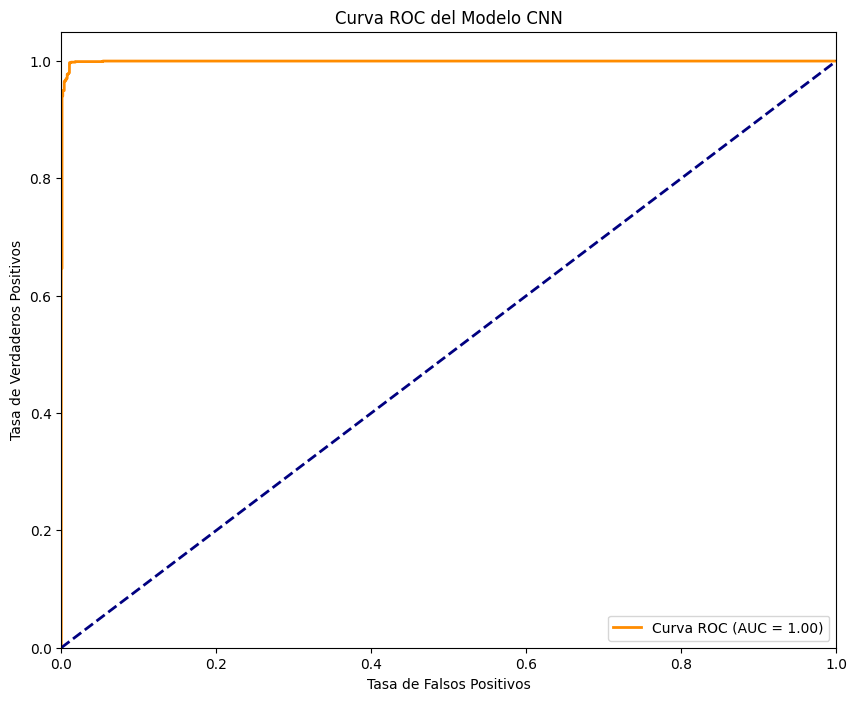

In [15]:
import numpy as np

# Verificar si hay valores nulos en x_train e y_train
print(np.isnan(X_train).any())
print(np.isnan(y_train).any())

# Reemplazar valores nulos por cero
x_train = np.nan_to_num(X_train, nan=0.0)
y_train = np.nan_to_num(y_train, nan=0.0)

# Definir el modelo de la CNN
def create_model():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model
# Crear el modelo
model = create_model()

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Convertir las probabilidades en etiquetas binarias (0 o 1) usando un umbral de 0.5
y_pred_binary = (y_pred > 0.5).astype(int)
 
# calcular métricas de evaluación
acc = accuracy_score(y_test, y_pred_binary)*100
f1 = f1_score(y_test, y_pred_binary, average='weighted')*100
prec = precision_score(y_test, y_pred_binary, average='weighted')*100
rec = recall_score(y_test, y_pred_binary, average='weighted')*100

print('Accuracy: %.2f' % acc)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % prec)
print('Recall: %.2f' % rec)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Reemplazar valores nulos por cero
x_test = np.nan_to_num(X_test, nan=0.0)
y_test = np.nan_to_num(y_test, nan=0.0)

# Predice las probabilidades de las clases para los datos de prueba
y_pred_prob = model.predict(x_test)

# Calcula la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Modelo CNN')
plt.legend(loc="lower right")
plt.show()

